In [3]:
import sys
sys.path.append('..')
import argparse
import seaborn as sns
import datasets
import numpy as np
import torch
import transformers
from tqdm.notebook import tqdm, trange
from data import get_data, TASKS
import matplotlib.pyplot as plt
from model_utils.prompt_classification import test_model_on_task_with_prefix
import pickle as pkl

Do a simple test

In [2]:
args_dict = {
    'max_dset_size': 10_000,
    'template_num_task_phrasing': 0,
    'n_shots': 1,
    'max_digit': 10,
}
args = argparse.Namespace(**args_dict)

task_names = TASKS.keys()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model_name = 'gpt2-medium'
model_name = 'EleutherAI/gpt-j-6B' # 'EleutherAI/gpt-neox-20b'
batch_size = 1

# load stuff
model = transformers.AutoModelForCausalLM.from_pretrained(model_name, output_hidden_states=False)
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name, output_hidden_states=False)


task_name = 'square_one'
prefix = f'asldjfo the following numbers. '
dset, check_answer_func, description = get_data(args=args, task_name=task_name)
test_model_on_task_with_prefix(dset=dset, model=model, tokenizer=tokenizer, prefix=prefix, batch_size=batch_size)

KeyboardInterrupt: 

Loop and check the tasks

In [1]:
task_information = {}
task_descriptions = []
task_names = ['add_two', 'divide_two', 'max_two', 'subtract_two', 'first_two', 'multiply_two']
# task_names = ['add_two', 'multiply_two', 'divide_two', 'subtract_two', 'max_two', 'first_two', 'SUFFIXES', 'square_one', 'exp_one', 'prime_one', 'double_one', 'fibonacci_one']
# task_names = list(set(TASKS.keys()) - {'SUFFIXES'})

for name in task_names:
    # print(name)
    dset, check_answer_func, description = get_data(args=args, task_name=name)
    task_descriptions.append(description)
    
task_descriptions

NameError: name 'get_data' is not defined

load losses / accs

In [5]:
model_name = 'EleutherAI/gpt-j-6B' # 'EleutherAI/gpt-neox-20b'
r = pkl.load(open(f'results/heatmap_{model_name.replace("/", "___")}.pkl', 'rb'))

In [6]:
losses = r['losses']
accuracies = r['accuracies']

visualize

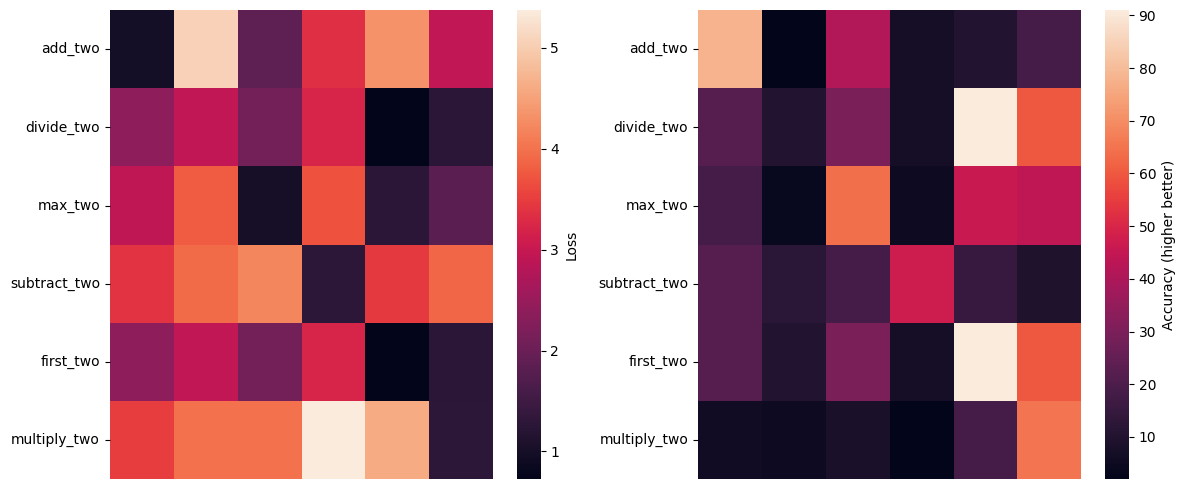

In [7]:
# sns.set()
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.heatmap(losses, yticklabels=task_names,
            xticklabels=task_descriptions, cbar_kws={'label': 'Loss'})
# sns.heatmap(torch.tensor(losses).softmax(dim=1), yticklabels=task_names,
            # xticklabels=task_descriptions, cbar_kws={'label': 'Loss, normalized (lower better)'})

plt.subplot(122)
sns.heatmap(torch.tensor(accuracies), yticklabels=task_names,
            xticklabels=task_descriptions, cbar_kws={'label': 'Accuracy (higher better)'})
plt.tight_layout()


Note on division: division task looks like “{prefix} Given the numbers 9 and 3, the answer is 9/3” and since it’s just next token prediction the model just needs to predict the 9, not the full 9/3. So the fact that “return the first of the inputs” is the best prompt makes a lot of sense

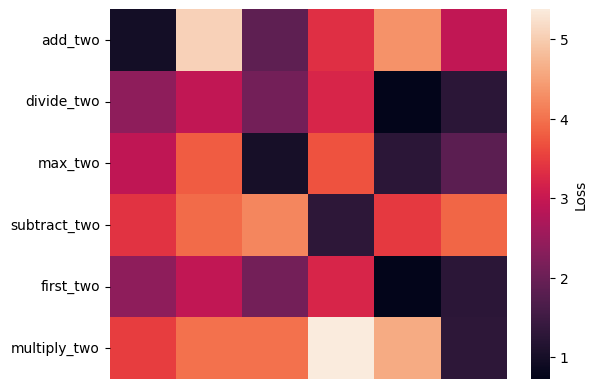

In [8]:
sns.heatmap(losses, yticklabels=task_names,
            xticklabels=task_descriptions, cbar_kws={'label': 'Loss'})
plt.savefig(f'figs/heatmap_{model_name.replace("/", "___")}')